### **GITHUB** **CONNECTION**

In [51]:
# !git clone https://github.com/Donerne/6100-Project-Two.git


### **IMPORT DEPENDENCIES**

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.decomposition import PCA, IncrementalPCA, SparsePCA

### **DATA PREPROCESSING**

In [53]:
# Load the datasets
full_df= pd.read_excel("full_data.xlsx")

In [54]:
# Display the first few rows of each dataset
print("Full Data:")
print(full_df.head())

Full Data:
   QUOTEDATE  VEHICLEYEAR          VEHICLEMAKE  \
0 2016-01-02         2006           VOLKSWAGEN   
1 2016-01-02         2017              HYUNDAI   
2 2016-01-02         2015  CHEVROLET TRUCK/VAN   
3 2016-01-02         2010               TOYOTA   
4 2016-01-04         2013                HONDA   

                        VEHICLEMODEL  ANNUAL_KM  COMMUTE_DISTANCE  \
0                       JETTA 2.5 4P    10000.0               NaN   
1                     ELANTRA GL 4DR    20000.0               NaN   
2  SILVERADO 2500 HD LT CREW CAB 4WD    15000.0               NaN   
3                     COROLLA CE 4DR    20000.0              20.0   
4                       CIVIC LX 4DR    30000.0              30.0   

  MARKING_SYSTEM TRACKING_SYSTEM VEHICLE_OWNERSHIP  VEHICLE_VALUE  ...  \
0            NaN             NaN             Owned         3000.0  ...   
1            NaN             NaN             Owned            1.0  ...   
2            NaN             NaN               NaN 

In [55]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117005 entries, 0 to 117004
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   QUOTEDATE                       117005 non-null  datetime64[ns]
 1   VEHICLEYEAR                     117005 non-null  int64         
 2   VEHICLEMAKE                     117005 non-null  object        
 3   VEHICLEMODEL                    117005 non-null  object        
 4   ANNUAL_KM                       117004 non-null  float64       
 5   COMMUTE_DISTANCE                76401 non-null   float64       
 6   MARKING_SYSTEM                  44 non-null      object        
 7   TRACKING_SYSTEM                 6 non-null       object        
 8   VEHICLE_OWNERSHIP               29055 non-null   object        
 9   VEHICLE_VALUE                   42173 non-null   float64       
 10  VEHICLEUSE                      117005 non-null  object 

In [56]:
full_df.describe()

,QUOTEDATE,VEHICLEYEAR,ANNUAL_KM,COMMUTE_DISTANCE,VEHICLE_VALUE,YEAR_OF_BIRTH,YEARS_LICENSED,YEARS_AS_PRINCIPAL_DRIVER,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND
count,117005,117005.000000,117004.000000,76401.000000,42173.000000,117005.000000,116994.000000,780.000000,117005.000000,117005.000000,117005.000000,117005.000000,117005.000000,101891.000000
mean,2016-08-04 01:40:19.681210368,2008.972258,14902.283700,44.856415,20756.987006,2001.577762,20.734294,12.182051,0.164301,0.003572,0.005983,0.058220,0.007162,0.218783
min,2016-01-02 00:00:00,1930.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-05-04 00:00:00,2006.000000,10000.000000,7.000000,5000.000000,1962.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016-07-28 00:00:00,2010.000000,15000.000000,10.000000,20000.000000,1975.000000,17.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016-10-31 00:00:00,2014.000000,20000.000000,16.000000,30000.000000,1988.000000,33.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2017-02-27 00:00:00,2019.000000,500000.000000,98000.000000,800000.000000,9999.000000,135.000000,50.000000,16.000000,9.000000,4.000000,4.000000,6.000000,1.000000
std,NaN,5.811886,8515.262146,783.395251,19271.775195,472.782821,16.236036,10.825026,0.520046,0.069583,0.085023,0.243394,0.104102,0.413423


In [57]:
full_df['IS_BOUND'] = full_df['IS_BOUND'].fillna(-1)
# full_df['IS_BOUND'] = full_df['IS_BOUND'].astype('int')
full_df['IS_BOUND']

,IS_BOUND
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
117000,-1.0
117001,-1.0
117002,-1.0
117003,-1.0


#### Checking For Duplicates

In [58]:
# Check for duplicates in the training dataset
full_duplicates = full_df.duplicated()
print("Duplicate rows in training data:")
print(full_duplicates.value_counts())

Duplicate rows in training data:
False    116945
True         60
Name: count, dtype: int64


OUTPUT INTERPRETATION

There are 60 duplicated rows in the training dataframe and 116,945 unique rows.

In [59]:
full_duplicates_rows = full_df[full_df.duplicated(keep=False)]

full_duplicates_rows

,QUOTEDATE,VEHICLEYEAR,VEHICLEMAKE,VEHICLEMODEL,ANNUAL_KM,COMMUTE_DISTANCE,MARKING_SYSTEM,TRACKING_SYSTEM,VEHICLE_OWNERSHIP,VEHICLE_VALUE,...,YEARS_AS_PRINCIPAL_DRIVER,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND
28669,2016-05-03,2008,TOYOTA,MATRIX WAGON,20000.0,20.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0.0
28675,2016-05-03,2008,TOYOTA,MATRIX WAGON,20000.0,20.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0.0
67509,2016-08-25,2012,HONDA,CIVIC LX 4DR,20000.0,10.0,NaN,NaN,NaN,4000.0,...,NaN,No,Single,Not Known,0,0,0,0,0,0.0
67514,2016-08-25,2012,HONDA,CIVIC LX 4DR,20000.0,10.0,NaN,NaN,NaN,4000.0,...,NaN,No,Single,Not Known,0,0,0,0,0,0.0
79993,2016-10-03,2009,GMC TRUCK/VAN,SIERRA 1500 WT REG CAB 4WD,20000.0,16.0,NaN,NaN,NaN,NaN,...,NaN,No,Married,Farm/Fisher,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116143,2017-02-08,2015,SUBARU,OUTBACK 3.6R WAGON AWD,10000.0,NaN,NaN,NaN,Owned,NaN,...,NaN,Yes,Married,Not Known,0,0,0,0,0,-1.0
116174,2017-02-22,2007,TOYOTA,YARIS LE 4DR HATCHBACK,15000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,No,Married,Not Known,0,0,0,0,0,-1.0
116382,2017-01-19,2016,HONDA,CIVIC EX 4DR,20000.0,10.0,NaN,NaN,NaN,NaN,...,NaN,No,Single,Not Known,0,0,0,0,0,-1.0
116418,2017-02-01,2004,FORD TRUCK/VAN,F150 STX SUPERCAB 4WD,10000.0,1.0,NaN,NaN,NaN,6000.0,...,NaN,Yes,Single,Not Known,1,0,0,0,0,-1.0


In [60]:
# Removing Duplicates on Training & Test Datasets
full_df.drop_duplicates(inplace=True)

print('Duplicates on full data removed. Number of rows remaining:', full_df.shape[0])

Duplicates on full data removed. Number of rows remaining: 116945


In [61]:
# Function to obtain percentages of missing values
def percent_missing(df):
    nan_percent = 100 * df.isnull().sum() / len(df)
    nan_percent = nan_percent[nan_percent > 0].sort_values()

    return nan_percent

# Function to plot out missing value percentages by column
def show_percent_missing(df):
    nan_percent = percent_missing(df)

    sns.barplot(x=nan_percent.index, y=nan_percent)
    plt.xticks(rotation=90)
    plt.ylabel('Missing Percentage %')
    plt.xlabel('Variables')

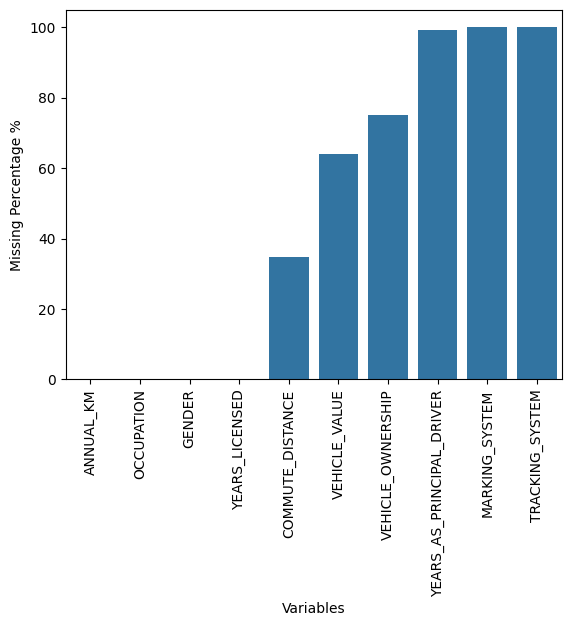

In [62]:
show_percent_missing(full_df)

Over 80% of values missing for 'years as principal driver', 'marking system' and 'tracking system'. These variables will be dropped and the remaining columns with missing values will be handled on a case by case situation

In [63]:
# Dropping Columns With Missing Values Over 80% on training data
full_df.drop(columns=['YEARS_AS_PRINCIPAL_DRIVER', 'MARKING_SYSTEM','TRACKING_SYSTEM'], axis =1, inplace=True)
full_df.head()

,QUOTEDATE,VEHICLEYEAR,VEHICLEMAKE,VEHICLEMODEL,ANNUAL_KM,COMMUTE_DISTANCE,VEHICLE_OWNERSHIP,VEHICLE_VALUE,VEHICLEUSE,GENDER,...,YEARS_LICENSED,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND
0,2016-01-02,2006,VOLKSWAGEN,JETTA 2.5 4P,10000.0,NaN,Owned,3000.0,Pleasure,Male,...,25.0,No,Married,Trades,0,0,0,0,0,0.0
1,2016-01-02,2017,HYUNDAI,ELANTRA GL 4DR,20000.0,NaN,Owned,1.0,Business,Male,...,10.0,No,Married,Not Known,0,0,0,0,0,0.0
2,2016-01-02,2015,CHEVROLET TRUCK/VAN,SILVERADO 2500 HD LT CREW CAB 4WD,15000.0,NaN,NaN,NaN,Pleasure,Male,...,39.0,No,Single,Not Known,0,0,0,0,0,0.0
3,2016-01-02,2010,TOYOTA,COROLLA CE 4DR,20000.0,20.0,NaN,NaN,Commute,Male,...,3.0,Yes,Single,Not Known,0,0,0,0,0,0.0
4,2016-01-04,2013,HONDA,CIVIC LX 4DR,30000.0,30.0,NaN,NaN,Commute,Male,...,2.0,Yes,Single,Not Known,0,0,0,0,0,0.0


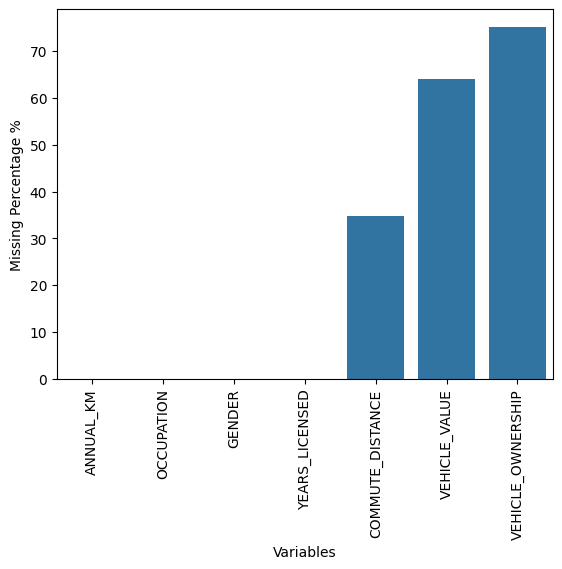

In [64]:
show_percent_missing(full_df)

(0.0, 0.03)

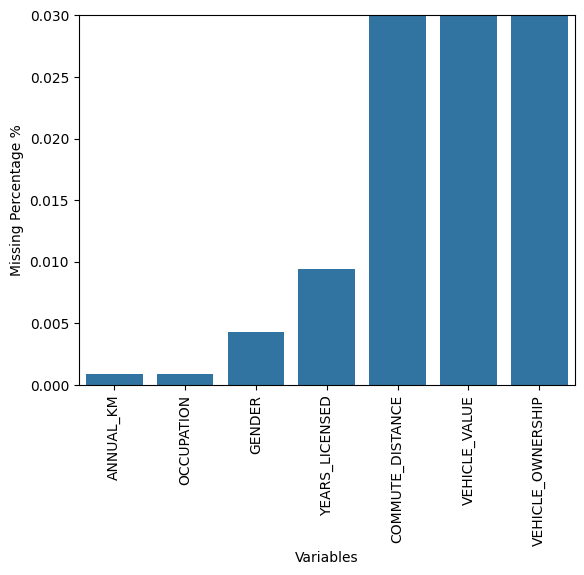

In [65]:
nan_percent = percent_missing(full_df)

sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)
plt.ylabel('Missing Percentage %')
plt.xlabel('Variables')
plt.ylim(0,0.03)

Before we proceed to fill in values for the remaining variables with missing data, I will check for 'abnormal' values in the variables and remove them

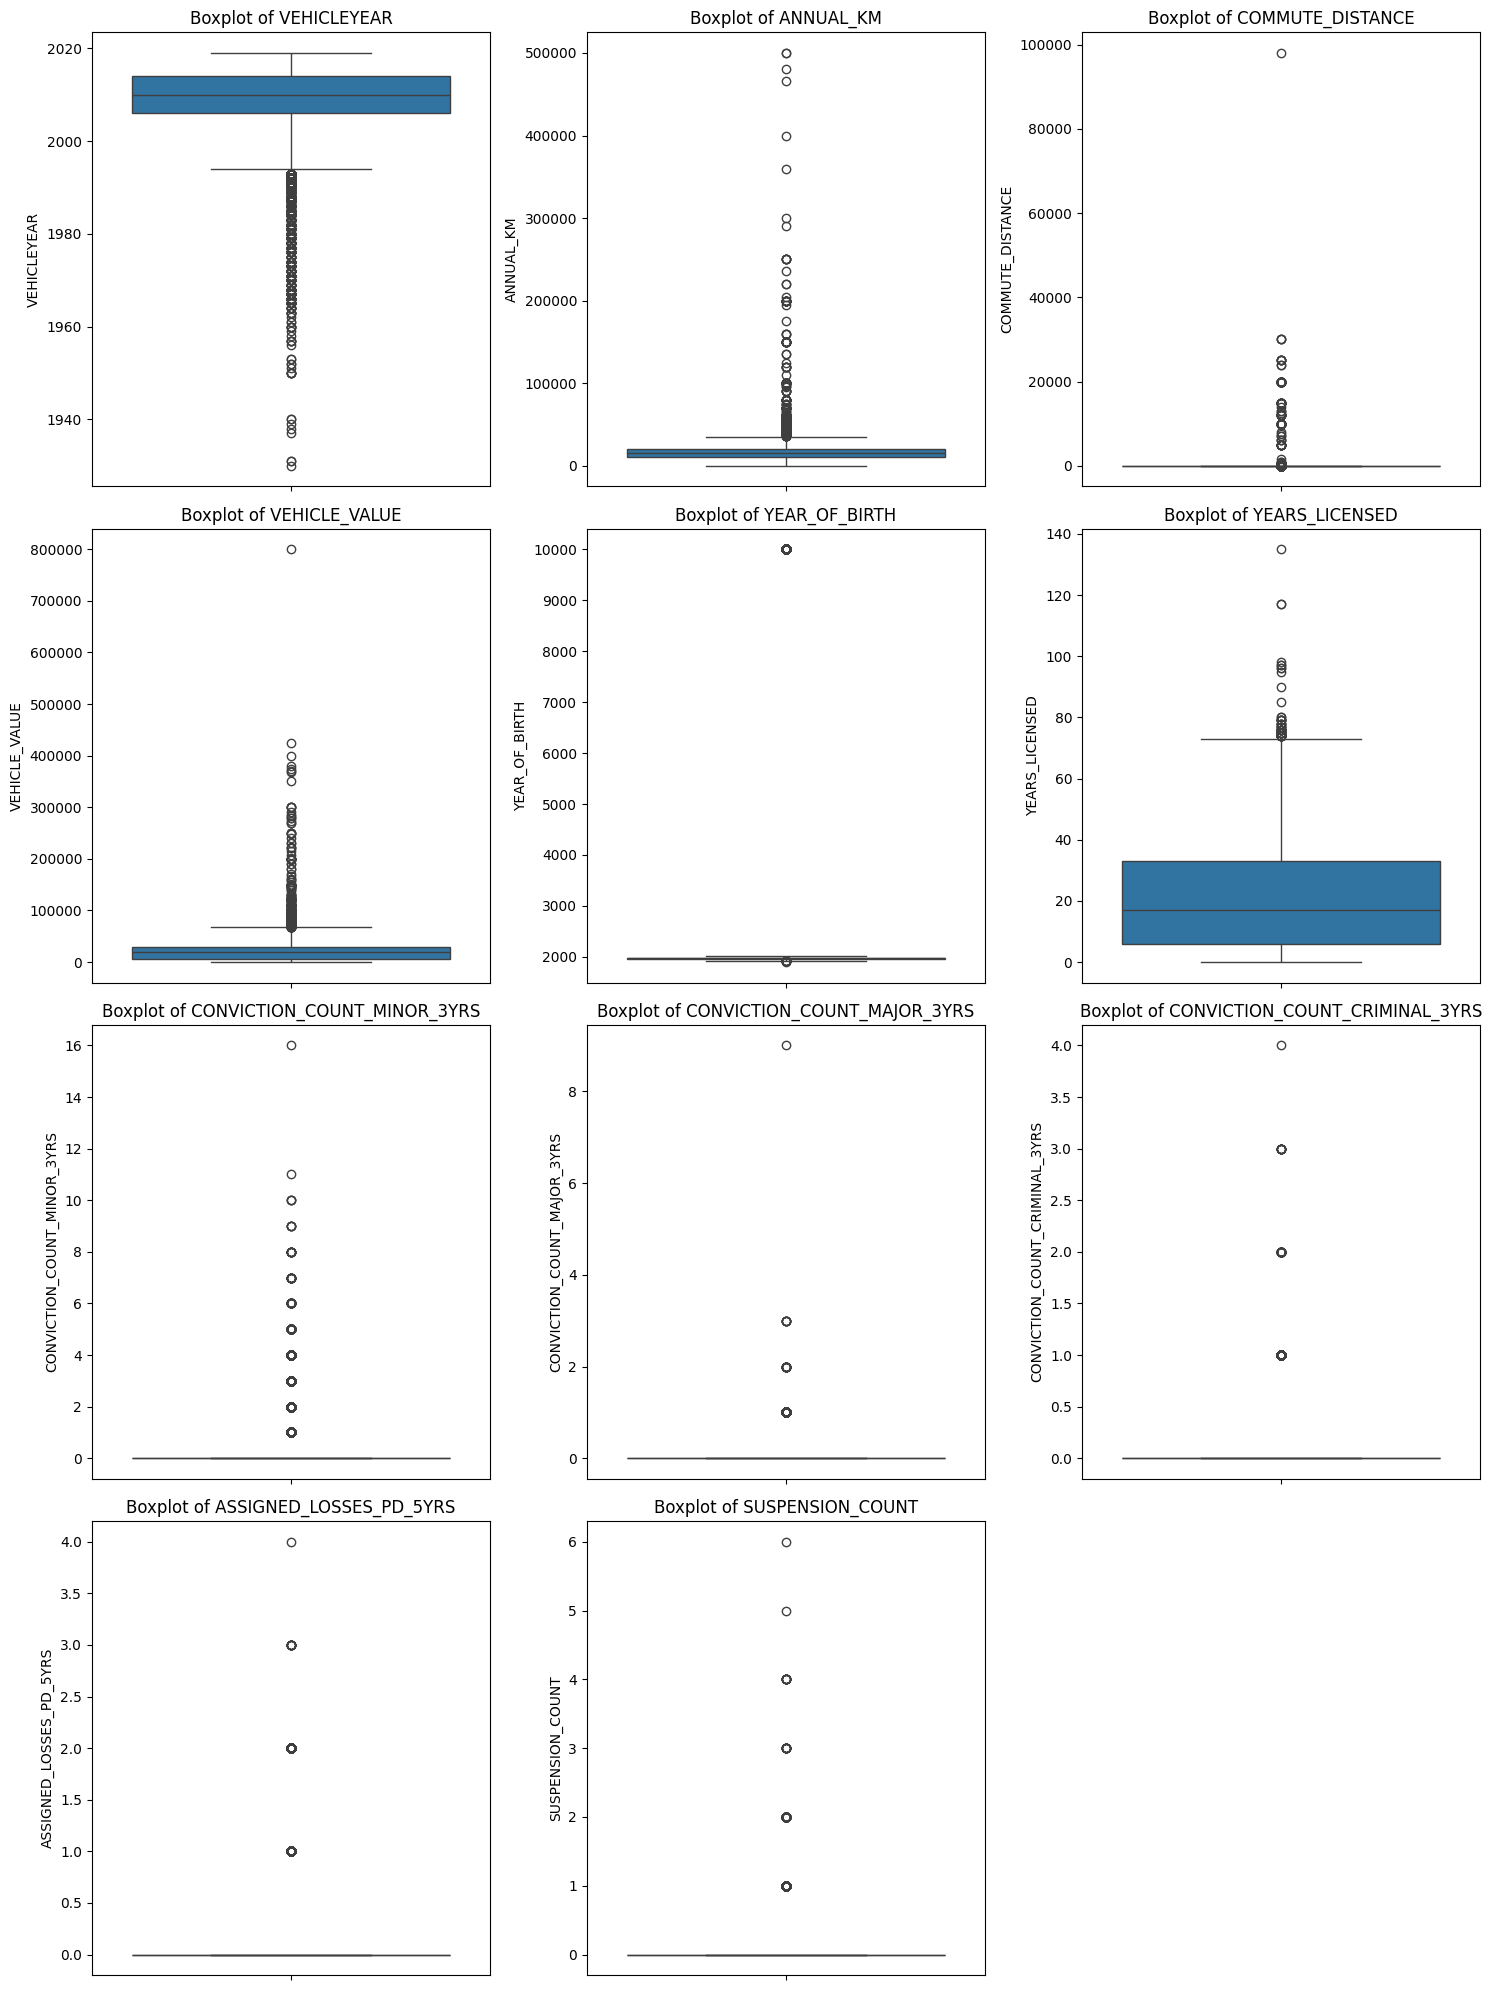

In [66]:
# Picking numerical Columns
num_cols = full_df.select_dtypes(include=['float64', 'number']).columns
num_cols = num_cols[num_cols != 'IS_BOUND']

# Creating Subplots Grid

fig, axes = plt.subplots(nrows=(len(num_cols) // 3) + 1, ncols=3, figsize=(15, 5 * ((len(num_cols) // 3) + 1)))

# Flattening axes for easy iteration
axes = axes.flatten()

# plotting each numeric column against 'IS_BOUND'
for i, col in enumerate(num_cols):
    sns.boxplot(y =full_df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Hiding any extra subplots where numeric columns are not a multiple of 3
for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [67]:
index_to_drop = full_df[full_df['COMMUTE_DISTANCE']>=10000].index
# Dropping the abnormal points from the full data
full_df = full_df.drop(index_to_drop, axis=0)

index_to_drop = full_df[full_df['ANNUAL_KM']>50000].index
# Dropping the abnormal points from the full data
full_df = full_df.drop(index_to_drop, axis=0)

index_to_drop = full_df[full_df['VEHICLEYEAR']<1940].index
# Dropping the abnormal points from the full data
full_df = full_df.drop(index_to_drop, axis=0)

index_to_drop = full_df[full_df['VEHICLE_VALUE']>=450000].index
# Dropping the abnormal points from the full data
full_df = full_df.drop(index_to_drop, axis=0)

index_to_drop = full_df[full_df['YEARS_LICENSED']>=80].index
# Dropping the abnormal points from the full data
full_df = full_df.drop(index_to_drop, axis=0)

index_to_drop = full_df[(full_df['YEAR_OF_BIRTH']==9999) | (full_df['YEAR_OF_BIRTH']>= 2000)].index
# Dropping the abnormal points from the full data
full_df = full_df.drop(index_to_drop, axis=0)


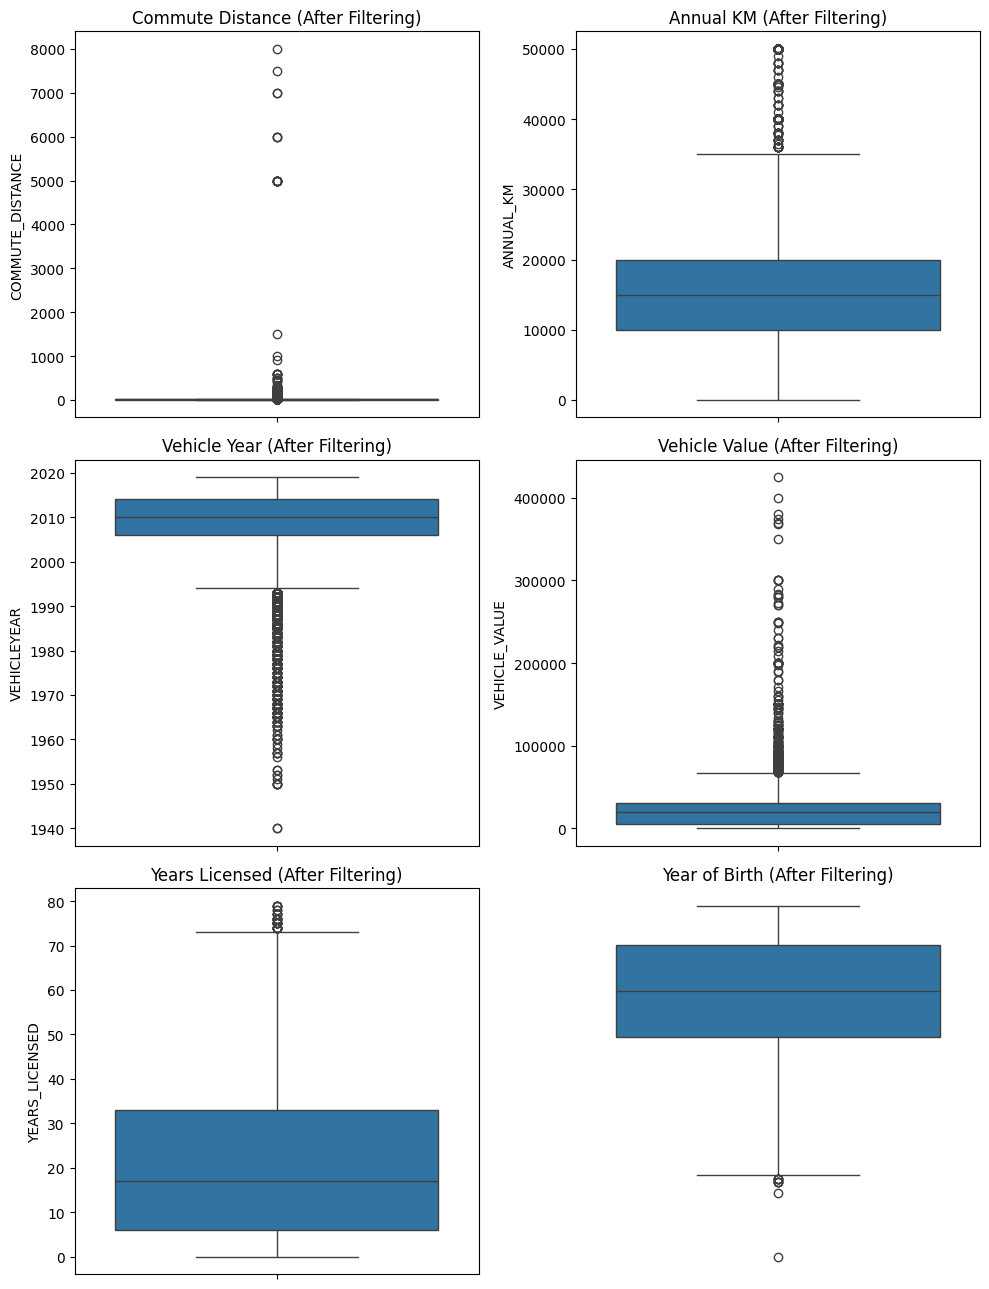

In [68]:
# Set up the figure and axes for the subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 13))

# Plotting Commute Distance
sns.boxplot(y=full_df['COMMUTE_DISTANCE'], ax=axes[0, 0])
axes[0, 0].set_title('Commute Distance (After Filtering)')

# Plotting Annual KM
sns.boxplot(y=full_df['ANNUAL_KM'], ax=axes[0, 1])
axes[0, 1].set_title('Annual KM (After Filtering)')

# Plotting Vehicle Year
sns.boxplot(y=full_df['VEHICLEYEAR'], ax=axes[1, 0])
axes[1, 0].set_title('Vehicle Year (After Filtering)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plotting Vehicle Value
sns.boxplot(y=full_df['VEHICLE_VALUE'], ax=axes[1, 1])
axes[1, 1].set_title('Vehicle Value (After Filtering)')

# Plotting Years Licensed
sns.boxplot(y=full_df['YEARS_LICENSED'], ax=axes[2, 0])
axes[2, 0].set_title('Years Licensed (After Filtering)')

# Plotting Years Licensed
sns.boxplot(y=full_df['YEAR_OF_BIRTH'], ax=axes[2, 1])
axes[2, 1].set_title('Year of Birth (After Filtering)')

#To remove the last unused plot.
axes[2, 1].axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Display all the plots
plt.show()

In [69]:
full_df.shape[0]

115782

In [70]:
# Filling missing values with the median
full_df["ANNUAL_KM"] = full_df["ANNUAL_KM"].fillna(full_df["ANNUAL_KM"].median())

# Filling missing values with the median
full_df["VEHICLE_OWNERSHIP"] = full_df["VEHICLE_OWNERSHIP"].fillna(full_df["VEHICLE_OWNERSHIP"].mode()[0])


# Filling missing values with median of each year_of_birth
full_df['YEARS_LICENSED'] = full_df.groupby('YEAR_OF_BIRTH')['YEARS_LICENSED'].transform(lambda value: value.fillna(value.median()))

# Filling missing values with median of each vehicle make
full_df['VEHICLE_VALUE'] = full_df.groupby('VEHICLEMAKE')['VEHICLE_VALUE'].transform(lambda value: value.fillna(value.median()))

# Filling remaining missing values with median of vehicle value for rows with blank vehicle model
full_df['VEHICLE_VALUE'] = full_df['VEHICLE_VALUE'].fillna(full_df['VEHICLE_VALUE'].median())


# Indexing retirees and unemployed to fill them with zeros
index_to_fill = full_df[(full_df['OCCUPATION'] == 'Retired') | (full_df['OCCUPATION'] == 'Unemployed')].index

# Replacing commute distances of indexed group with zero
full_df.loc[index_to_fill, 'COMMUTE_DISTANCE'] = 0

# Filling remaining missing values with median of each occupation
full_df['COMMUTE_DISTANCE'] = full_df.groupby('OCCUPATION')['COMMUTE_DISTANCE'].transform(lambda value: value.fillna(value.median()))

# Filling remaining missing values with median of commute_distance for rows with blank occupation
full_df['COMMUTE_DISTANCE'] = full_df['COMMUTE_DISTANCE'].fillna(full_df['COMMUTE_DISTANCE'].median())

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

In [71]:
full_df.isnull().sum()

,0
QUOTEDATE,0
VEHICLEYEAR,0
VEHICLEMAKE,0
VEHICLEMODEL,0
ANNUAL_KM,0
COMMUTE_DISTANCE,0
VEHICLE_OWNERSHIP,0
VEHICLE_VALUE,0
VEHICLEUSE,0
GENDER,0


In [72]:
# Groupoing vehicle makes
category_mapping = {'1FTFW1EF8BFA01523': 'FORD', 'FORD F150': 'FORD', 'F150': 'FORD', 'F250': 'FORD',
                    'FORD EDGE': 'FORD', 'FORD FOCUS': 'FORD', 'FORD MUSTANG': 'FORD', 'FORD TRUCK/VAN': 'FORD',
                    'FORD CAMION/VAN': 'FORD', '2XXXXXXXXXXXXXXXXXX': 'NISSAN','PASSAT': 'NISSAN',
                    'NISSAN CAMION/VAN': 'NISSAN', 'NISSAN TRUCK/VAN': 'NISSAN', 'NISSSAN': 'NISSAN', 'NISAN': 'NISSAN',
                    'ACCURA': 'ACURA', 'ACURA CAMION/VAN': 'ACURA', 'ACURA TRUCK/VAN': 'ACURA', 'ALFA': 'ALFA ROMEO',
                    'AMERICAN MOTORS': 'AMC', 'ARTIC CAT': 'ARCTIC CAT', 'ARTCIT CAT': 'ARCTIC CAT',
                    'AUDI TRUCK/VAN': 'AUDI', 'BENTLEY TRUCK/VAN': 'BENTLEY', 'BMW CAMION/VAN': 'BMW',
                    'BMW TRUCK/VAN': 'BMW', 'BOMBADIER': 'BOMBARDIER', 'BUICK TRUCK/VAN': 'BUICK',
                    'CADILLAC CAMION/VAN': 'CADILLAC', 'CADILLAC TRUCK/VAN': 'CADILLAC', 'CADILLIAC': 'CADILLAC',
                    'CEVROLET': 'CHEVROLET', 'CHEVY': 'CHEVROLET', 'CHCVIOE': 'CHEVROLET', 'CHEV': 'CHEVROLET',
                    'CHEVRELOT': 'CHEVROLET', 'CHEVROLE': 'CHEVROLET', 'CHEVROLER': 'CHEVROLET',
                    'CHEVROLET CAMION/VAN': 'CHEVROLET', 'CHEVROLET TRUCK/VAN': 'CHEVROLET', 'CHEV CRUZ': 'CHEVROLET',
                    'CHRSYLER': 'CHRYSLER', 'CHRYLSER': 'CHRYSLER', 'CHRYSLER TRUCK/VAN': 'CHRYSLER',
                    'CRYSLER': 'CHRYSLER', 'DODDGE': 'DODGE', 'DODGE GRAND CARAVAN': 'DODGE', 'DODGE RAM': 'DODGE',
                    'DODGE/RAM': 'DODGE', 'DODGE/RAM CAMION/VAN': 'DODGE', 'DODGE/RAM TRUCK/VAN': 'DODGE',
                    'HONDA CIVIC': 'HONDA', 'HONDA 650': 'HONDA', 'HONDA ACCORD': 'HONDA', 'HONDA CAMION/VAN': 'HONDA',
                    'HONDA  CIVIC': 'HONDA', 'HONDA CR- V': 'HONDA', 'HONDA TRUCK/VAN': 'HONDA', 'HONODA': 'HONDA',
                    'VOLKSWAGON': 'VOLKSWAGEN', 'VOLKSWAGON JETTA': 'VOLKSWAGEN', 'VOLLKS': 'VOLKSWAGEN',
                    'VW': 'VOLKSWAGEN', 'WV': 'VOLKSWAGEN', 'VOLKS': 'VOLKSWAGEN',
                    'VOLKSWAGEN CAMION/VAN': 'VOLKSWAGEN', 'VOLKWAGEN TRUCK/VAN': 'VOLKSWAGEN',
                    'VOLKSWAGEN CAMION/VAN': 'VOLKSWAGEN', 'VOLKSWAGENJAVASCRIPT:VOID(0)': 'VOLKSWAGEN',
                    'TOTOTA': 'TOYOTA', 'TOYOATA': 'TOYOTA', 'TOYOTA CAMION/VAN': 'TOYOTA',
                    'TOYOTA HIGHLANDER': 'TOYOTA', 'TOYOTA TRUCK/VAN': 'TOYOTA', 'TOYOTO': 'TOYOTA', 'TOYTO': 'TOYOTA',
                    'PORCHE': 'PORSCHE', 'PORSCHE CAMION/VAN': 'PORSCHE', 'PORSCHE TRUC/VAN': 'PORSCHE',
                    'PROSCHE': 'PORSCHE', 'PONITAC': 'PONTIAC', 'PONTAIC': 'PONTIAC', 'PONTIAC CAMION/VAN': 'PONTIAC',
                    'PONTIAC TRUCK/VAN': 'PONTIAC', 'PONTIIAC': 'PONTIAC', 'PLYMONTH': 'PLYMOUTH',
                    'PLYMOUTH TRUCK/VAN': 'PLYMOUTH', 'MITIBUSHI': 'MITSUBISHI', 'HUNDAI': 'HYUNDAI',
                    'HUNDAY': 'HYUNDAI', 'HYNDAI': 'HYUNDAI', 'HYNDEI': 'HYUNDAI', 'HYUANDAI': 'HYUNDAI',
                    'HYUNDAI CAMION/VAN': 'HYUNDAI', 'HYUNDAI TRUCK/VAN': 'HYUNDAI', 'HYUNDIA': 'HYUNDAI',
                    'INFINITI TRUCK/VAN': 'INFINITI', 'INFINITY': 'INFINTI', 'INFINTI': 'INFINITI',
                    'JEEP WRANGLER': 'JEEP', 'JEPP': 'JEEP', 'LAND ROVER': 'LANDROVER', 'MAZDA 3': 'MAZDA',
                    'MAZDA CAMION/VAN': 'MAZDA', 'MAZDA TRUCK/VAN': 'MAZDA', 'MAZDA3': 'MAZDA', 'MAZDS': 'MAZDA',
                    'MECEDEZ': 'MERCEDES', 'MERCEDES BENZ': 'MERCEDES', 'MERCEDES-BENZ': 'MERCEDES',
                    'MERCEDES-BENZ TRUCK': 'MERCEDES'}


full_df['VEHICLEMAKE'] = full_df['VEHICLEMAKE'].map(category_mapping).fillna(full_df['VEHICLEMAKE'])

I have used frequency encoding instead of target encoding

In [73]:
# # frequency encoding
# frequency_encoding = full_df['VEHICLEMODEL'].value_counts().to_dict()

# full_df['VEHICLEMODEL'] = full_df['VEHICLEMODEL'].map(frequency_encoding)

# full_df.tail()

In [74]:
# Defining Categorical columns. Numeric columns excluding is_bound were obtained above
num_cols
cat_cols = full_df.select_dtypes(include='object').columns


full_df[cat_cols] = full_df[cat_cols].astype(str)
full_df[cat_cols] = full_df[cat_cols].apply(lambda x: x.astype(str))

In [75]:
# Obtainig Dummies
full_df = pd.get_dummies(full_df, drop_first=True)

full_df.tail()

,QUOTEDATE,VEHICLEYEAR,ANNUAL_KM,COMMUTE_DISTANCE,VEHICLE_VALUE,YEAR_OF_BIRTH,YEARS_LICENSED,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,...,OCCUPATION_Professional/Health,OCCUPATION_Professional/Other,OCCUPATION_Professional/Social,OCCUPATION_Retired,OCCUPATION_Sales,OCCUPATION_Service Work,OCCUPATION_Student,OCCUPATION_Trades,OCCUPATION_Tradesman,OCCUPATION_Unemployed
117000,2017-02-27,2012,20000.0,16.0,18000.0,1988,9.0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
117001,2017-02-27,2011,10000.0,8.0,12418.0,1973,27.0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
117002,2017-02-27,2007,15000.0,5.0,28000.0,1961,32.0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
117003,2017-02-27,2014,12000.0,13.0,35000.0,1991,9.0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
117004,2017-02-27,2017,25000.0,23.0,20000.0,1959,41.0,0,0,0,...,False,True,False,False,False,False,False,False,False,False


In [76]:
full_df.drop(columns = 'QUOTEDATE', axis=1, inplace = True)


num_cols = list(full_df.select_dtypes(include=['float64', 'int64']).columns)

num_cols.remove('IS_BOUND')
num_cols

['VEHICLEYEAR',
 'ANNUAL_KM',
 'COMMUTE_DISTANCE',
 'VEHICLE_VALUE',
 'YEAR_OF_BIRTH',
 'YEARS_LICENSED',
 'CONVICTION_COUNT_MINOR_3YRS',
 'CONVICTION_COUNT_MAJOR_3YRS',
 'CONVICTION_COUNT_CRIMINAL_3YRS',
 'ASSIGNED_LOSSES_PD_5YRS',
 'SUSPENSION_COUNT']

# Standardizing Numeric Variables

In [77]:
scaler = StandardScaler()

full_df[num_cols] = scaler.fit_transform(full_df[num_cols])

full_df.head()

,VEHICLEYEAR,ANNUAL_KM,COMMUTE_DISTANCE,VEHICLE_VALUE,YEAR_OF_BIRTH,YEARS_LICENSED,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,...,OCCUPATION_Professional/Health,OCCUPATION_Professional/Other,OCCUPATION_Professional/Social,OCCUPATION_Retired,OCCUPATION_Sales,OCCUPATION_Service Work,OCCUPATION_Student,OCCUPATION_Trades,OCCUPATION_Tradesman,OCCUPATION_Unemployed
0,-0.516626,-0.720497,-0.048177,-1.360099,0.087323,0.260764,-0.316204,-0.051432,-0.070403,-0.239576,...,False,False,False,False,False,False,False,True,False,False
1,1.386308,0.804044,-0.048177,-1.584983,-0.956625,-0.664849,-0.316204,-0.051432,-0.070403,-0.239576,...,False,False,False,False,False,False,False,False,False,False
2,1.040320,0.041773,-0.048177,0.077765,-0.833807,1.124669,-0.316204,-0.051432,-0.070403,-0.239576,...,False,False,False,False,False,False,False,False,False,False
3,0.175350,0.804044,0.091292,-0.385276,0.701410,-1.096801,-0.316204,-0.051432,-0.070403,-0.239576,...,False,False,False,False,False,False,False,False,False,False
4,0.694332,2.328585,0.230761,-0.235303,0.517184,-1.158509,-0.316204,-0.051432,-0.070403,-0.239576,...,False,False,False,False,False,False,False,False,False,False


In [78]:
full_df['IS_BOUND']

,IS_BOUND
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
117000,-1.0
117001,-1.0
117002,-1.0
117003,-1.0


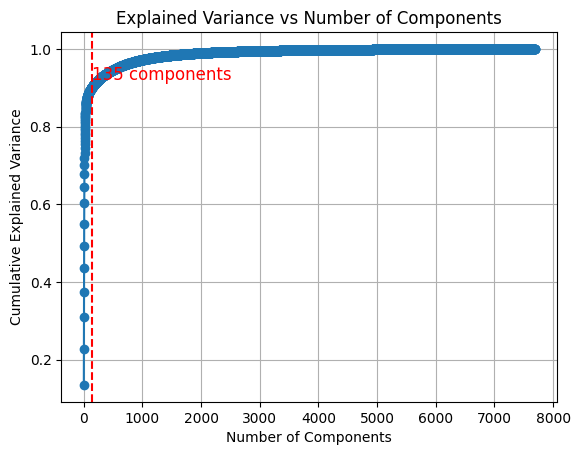

In [79]:

# Applying PCA with different numbers of components
pca = PCA()

# Obtainig all predictors
x_cols = full_df.loc[:, full_df.columns != 'IS_BOUND']

pca.fit(x_cols)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# elbow point
elbow_point = np.argmax(cumulative_variance >= 0.90) + 1

# Plotting explained variance ratios
# plt.plot(range(1, x_cols.shape[1] + 1), np.cumsum(pca.explained_variance_ratio_))

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o',
         label='Cumulative Explained Variance')
plt.axvline(x=elbow_point, color='r', linestyle='--',
            label=f'Elbow at {elbow_point} components')

# display number of components at elbow point
plt.text(elbow_point + 0.2, cumulative_variance[elbow_point - 1] + 0.02,
         f'{elbow_point} components', color='red', fontsize=12)

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

In [80]:
# Find the number of components that explain at least 95% of the variance
threshold = 0.90
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Get the number of components that reaches the threshold
n_components_90 = np.argmax(cumulative_variance >= threshold) + 1
print(f"Number of components to explain at least 90% variance: {n_components_90}")

Number of components to explain at least 90% variance: 135


In [82]:
# fitting PCA to predictors
pca = PCA(n_components=elbow_point)

x_cols = full_df.loc[:, full_df.columns != 'IS_BOUND']

pca_result = pca.fit_transform(x_cols)

# Creating a new dataframe to use for further analysis
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(elbow_point)])

# Adding IS_BOUND to the new dataset
pca_df = pd.concat([pca_df, full_df['IS_BOUND'].reset_index(drop=True)], axis=1)



In [90]:
# Creating a condition to split dataset on
condition = (pca_df['IS_BOUND'] == -1)
condition.value_counts()


,count
IS_BOUND,
False,100930
True,14852


In [91]:
train_data = pca_df[~condition]

test_data = pca_df[condition]